In [19]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('../data/organized_imdb_dataset.csv') #load the data
print(df.head())

  episode_id    show_id  season  episode  rating  votes  \
0  tt0041951  tt0041038     1.0      9.0     7.6     90   
1  tt0635319  tt0041038     4.0     13.0     8.4     44   
2  tt0635320  tt0041038     5.0     21.0     8.9     47   
3  tt0635321  tt0041038     1.0     41.0     7.7     63   
4  tt0635322  tt0041038     3.0     27.0     7.6     37   

              episode_title is_adult    year  runtime_minutes    genre  \
0            The Tenderfeet    False  1949.0             30.0  Western   
1            A Broken Match    False  1954.0             23.0  Western   
2         A Harp for Hannah    False  1957.0             23.0  Western   
3       A Pardon for Curley    False  1950.0             23.0  Western   
4  A Stage for Mademoiselle    False  1953.0             23.0  Western   

        show_title  
0  The Lone Ranger  
1  The Lone Ranger  
2  The Lone Ranger  
3  The Lone Ranger  
4  The Lone Ranger  


/var/folders/rm/dnyhsnfd6ll4tl6sg03cj7t80000gn/T/ipykernel_72176/3952376479.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/organized_imdb_dataset.csv') #load the data


In [27]:
df_new = df.copy()

# Convert the data types of the columns to the correct data type
df_new['episode_id'] = df_new['episode_id'].astype(str)
df_new['show_id'] = df_new['show_id'].astype(str)
df_new['episode_title'] = df_new['episode_title'].astype(str)  
df_new['show_title'] = df_new['show_title'].astype(str)

# Convert to numeric and handle NaN values
df_new['season'] = pd.to_numeric(df_new['season'], errors='coerce').fillna(pd.NA).astype('Int64')
df_new['episode'] = pd.to_numeric(df_new['episode'], errors='coerce').fillna(pd.NA).astype('Int64')
df_new['votes'] = pd.to_numeric(df_new['votes'], errors='coerce').fillna(pd.NA).astype('Int64')
df_new['runtime_minutes'] = pd.to_numeric(df_new['runtime_minutes'], errors='coerce').fillna(pd.NA).astype('Int64')
df_new['rating'] = pd.to_numeric(df_new['rating'], errors='coerce').fillna(pd.NA).astype(float)
df_new['year'] = pd.to_numeric(df_new['year'], errors='coerce').fillna(pd.NA).astype('Int64')

# Handle non-boolean values in 'is_adult' and convert to boolean
df_new.loc[~df_new['is_adult'].isin([0, 1]), 'is_adult'] = pd.NA
df_new['is_adult'] = df_new['is_adult'].astype('boolean')

print(df_new.head())

  episode_id    show_id  season  episode  rating  votes  \
0  tt0041951  tt0041038       1        9     7.6     90   
1  tt0635319  tt0041038       4       13     8.4     44   
2  tt0635320  tt0041038       5       21     8.9     47   
3  tt0635321  tt0041038       1       41     7.7     63   
4  tt0635322  tt0041038       3       27     7.6     37   

              episode_title  is_adult  year  runtime_minutes    genre  \
0            The Tenderfeet     False  1949               30  Western   
1            A Broken Match     False  1954               23  Western   
2         A Harp for Hannah     False  1957               23  Western   
3       A Pardon for Curley     False  1950               23  Western   
4  A Stage for Mademoiselle     False  1953               23  Western   

        show_title  
0  The Lone Ranger  
1  The Lone Ranger  
2  The Lone Ranger  
3  The Lone Ranger  
4  The Lone Ranger  


## Data Visualization

We will visualize the data to identify patterns, trends, and outliers using various plots and charts.

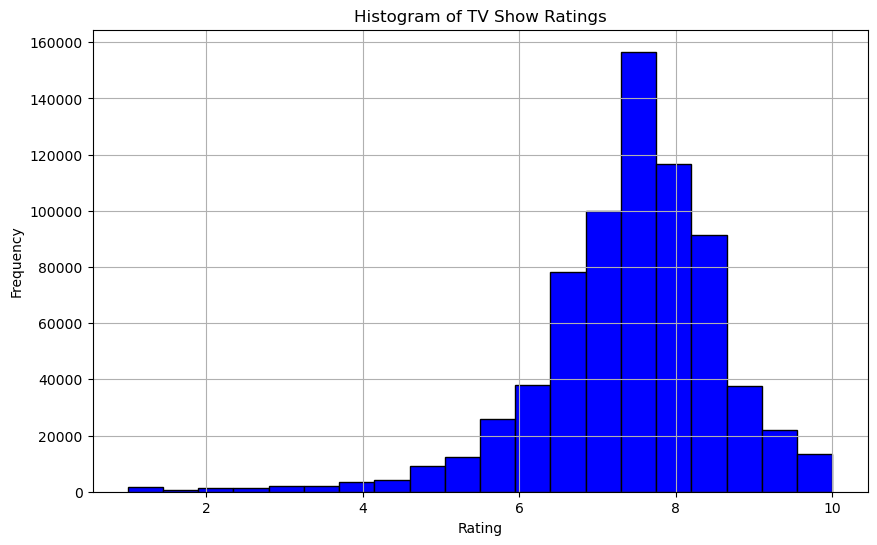

In [22]:
# Plot histogram for the ratings
plt.figure(figsize=(10, 6))
plt.hist(df_new['rating'].dropna(), bins=20, color='blue', edgecolor='black')
plt.title('Histogram of TV Show Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

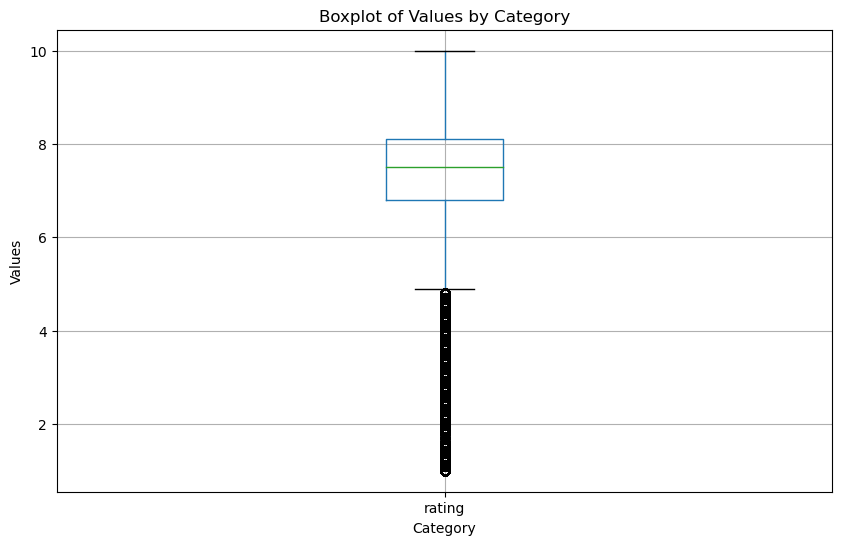

In [23]:
# Create a boxplot
plt.figure(figsize=(10, 6))
df_new.boxplot(column='rating')
plt.title('Boxplot of Values by Category')
plt.suptitle('')  # Suppress the default title to keep it clean
plt.xlabel('Category')
plt.ylabel('Values')
plt.show()

In [24]:
# Summary statistics for the rating variable
summary_stats = df_new['rating'].describe()
print(summary_stats)

count    718795.000000
mean          7.389063
std           1.168402
min           1.000000
25%           6.800000
50%           7.500000
75%           8.100000
max          10.000000
Name: rating, dtype: float64


In [25]:
# Calculate the percentile rank of a given value x
x = 4 
percentile_rank = df_new['rating'].rank(pct=True).loc[df_new['rating'] == x].values[0] *100
# Print the percentile rank
print(f"The value {x} is in the {percentile_rank:.2f} percentile.")

# Value of the bottom 1% (1st percentile) for the rating variable
percentile_1 = df_new['rating'].quantile(0.1)
print(f"In the bottom 10 percentile, the value is {percentile_1}.")

The value 4 is in the 1.57 percentile.
In the bottom 10 percentile, the value is 6.0.


In [42]:
df_test = df_new.copy()
df_test['genre'] = df_test['genre'].str.lower()

# Assuming you have a DataFrame df_test with a 'genre' column
# Split the 'genre' column into separate columns for each genre
genre_dummies = df_test['genre'].str.get_dummies(sep=',')

# Concatenate the dummy variables with the original DataFrame
df_test = pd.concat([df_test, genre_dummies], axis=1)

df_test.head()

,episode_id,show_id,season,episode,rating,votes,episode_title,is_adult,year,runtime_minutes,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,tt0041951,tt0041038,1,9,7.6,90,The Tenderfeet,False,1949,30,...,0,0,0,0,0,0,0,0,0,1
1,tt0635319,tt0041038,4,13,8.4,44,A Broken Match,False,1954,23,...,0,0,0,0,0,0,0,0,0,1
2,tt0635320,tt0041038,5,21,8.9,47,A Harp for Hannah,False,1957,23,...,0,0,0,0,0,0,0,0,0,1
3,tt0635321,tt0041038,1,41,7.7,63,A Pardon for Curley,False,1950,23,...,0,0,0,0,0,0,0,0,0,1
4,tt0635322,tt0041038,3,27,7.6,37,A Stage for Mademoiselle,False,1953,23,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# Sum the values of each genre column to get the count of each genre
genre_popularity = genre_dummies.sum().sort_values(ascending=False)

# Optionally, convert it to a DataFrame for better visualization
genre_popularity_df = genre_popularity.reset_index()
genre_popularity_df.columns = ['Genre', 'Count']

# Display the DataFrame
genre_popularity_df

,Genre,Count
0,comedy,276269
1,drama,245054
2,animation,126665
3,action,119050
4,adventure,118163
5,crime,109295
6,documentary,73850
7,family,69204
8,reality-tv,66729
9,romance,55968


In [46]:
# Calculate the average rating per genre
weighted_ratings = genre_dummies.mul(df_test['rating'], axis=0)
genre_rating_sum = weighted_ratings.sum()
genre_count = genre_dummies.sum()
average_genre_rating = (genre_rating_sum / genre_count)

# Convert to a DataFrame for better visualization
average_genre_rating_df = average_genre_rating.reset_index()
average_genre_rating_df.columns = ['Genre', 'Average Rating']

# Merge the genre popularity DataFrame with the average rating DataFrame
genre_stats_df = pd.merge(genre_popularity_df, average_genre_rating_df, on='Genre')

# Display the merged DataFrame
genre_stats_df.sort_values(by='Count', ascending=False, inplace=True)
genre_stats_df

,Genre,Count,Average Rating
0,comedy,276269,7.348819
1,drama,245054,7.569601
2,animation,126665,7.303988
3,action,119050,7.406600
4,adventure,118163,7.339160
5,crime,109295,7.464287
6,documentary,73850,7.454015
7,family,69204,7.328706
8,reality-tv,66729,7.157037
9,romance,55968,7.488267
